Building an NLP Pipepline to:
- preprocess
- tokenize
- unsupervise
- supervise

# A. Setting Up

In [1]:
import pandas
import numpy
import spacy
%matplotlib inline

In [2]:
data_in = pandas.read_csv('deceptive-opinion.csv')

# B. Describe Data

In [3]:
data_in.head().append(data_in.tail())

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama..."


In [4]:
data_in.pivot_table(
    columns=['deceptive','polarity'],
    index = ['hotel'],
    aggfunc = len).fillna(0)

source                                 text           \
deceptive        deceptive          truthful          deceptive            
polarity          negative positive negative positive  negative positive   
hotel                                                                      
affinia                 20       20       20       20        20       20   
allegro                 20       20       20       20        20       20   
amalfi                  20       20       20       20        20       20   
ambassador              20       20       20       20        20       20   
conrad                  20       20       20       20        20       20   
fairmont                20       20       20       20        20       20   
hardrock                20       20       20       20        20       20   
hilton                  20       20       20       20        20       20   
homewood                20       20       20       20        20       20   
hyatt                   20       20       20       20        20       20   
intercontinental        20       20       20       20        20       20   
james                   20       20       20       20        20       20   
knickerbocker           20       20       20       20        20       20   
monaco                  20       20       20       20        20       20   
omni                    20       20       20       20        20       20   
palmer                  20       20       20       20        20       20   
sheraton                20       20       20       20        20       20   
sofitel                 20       20       20       20        20       20   
swissotel               20       20       20       20        20       20   
talbott                 20       20       20       20        20       20   

                                    
deceptive        truthful           
polarity         negative positive  
hotel                               
affinia                20       20  
allegro                20       20  
amalfi                 20       20  
ambassador             20       20  
conrad                 20       20  
fairmont               20       20  
hardrock               20       20  
hilton                 20       20  
homewood               20       20  
hyatt                  20       20  
intercontinental       20       20  
james                  20       20  
knickerbocker          20       20  
monaco                 20       20  
omni                   20       20  
palmer                 20       20  
sheraton               20       20  
sofitel                20       20  
swissotel              20       20  
talbott                20       20

## Graph

In [5]:
#Mean Length Funciton
def mean_len(group, mean = True):
    if mean == True:
        return numpy.mean(group.text.str.len())
    else:
        return group.text.str.len()

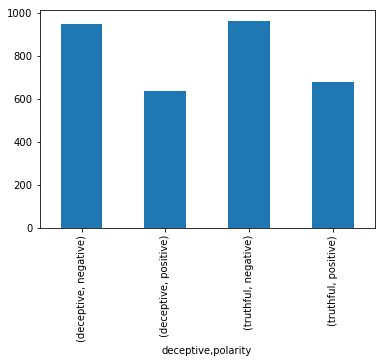

In [6]:
_ = data_in.groupby(
    ['deceptive','polarity']).apply(
    mean_len, mean = True).plot('bar')

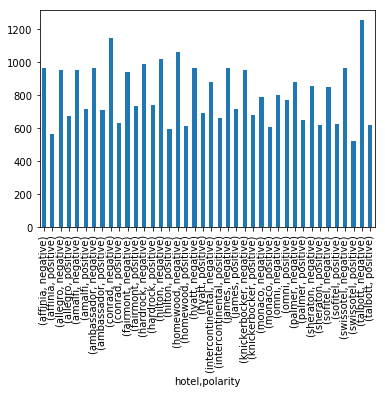

In [7]:
_= data_in.groupby(
    ['hotel','polarity']).apply(
    mean_len, mean = True).plot('bar')

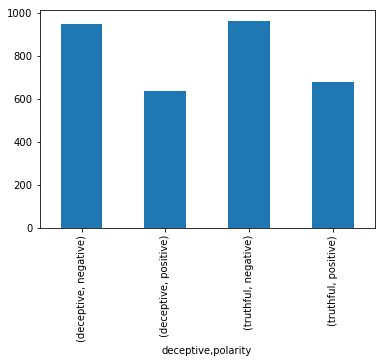

In [8]:
_ = data_in.groupby(
    ['deceptive','polarity']).apply(
    mean_len, mean = True).plot('bar')

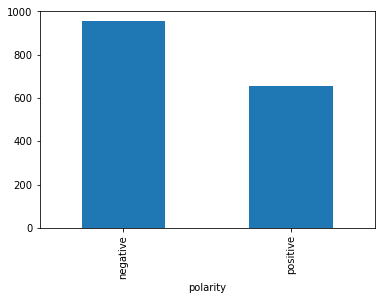

In [9]:
_ = data_in.groupby(
    ['polarity']).apply(
    mean_len, mean = True).plot('bar')

# Testing

In [10]:
from scipy.stats import ttest_ind
pandas.set_option('display.float_format', lambda x: '%.3f' % x)
test_a = ttest_ind(
    data_in[data_in.polarity == 'positive'].text.str.len(),
    data_in[data_in.polarity == 'negative'].text.str.len())

test_b = ttest_ind(
    data_in[data_in.source == 'TripAdvisor'].text.str.len(),
    data_in[data_in.source != 'TripAdvisor'].text.str.len())

test_c = ttest_ind(
    data_in[data_in.deceptive == 'deceptive'].text.str.len(),
    data_in[data_in.deceptive == 'truthful'].text.str.len())

test_a, test_b, test_c

(Ttest_indResult(statistic=-13.507204854821099, pvalue=1.8968798894685588e-39),
 Ttest_indResult(statistic=-6.4399626289335314, pvalue=1.5767614748756925e-10),
 Ttest_indResult(statistic=-1.2520931090803307, pvalue=0.21071916472895064))

# Preprocessing
ToDo:
- misspellings
- sentence length
- number of sentences
- phrase modeling: first and second order

In [11]:
data_nlp = data_in.copy()
data_nlp.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


## Read Stop Words
To Dos
- improve programming .. add to processing pipeline
- Fix english model issue

In [12]:
from nltk.corpus import stopwords
import re
stop = set(stopwords.words('english'))

In [13]:

#symbol_remover = '\\!|\\.|\\,|\\-'

#def prep(data_to_prep, stop_words_in, symbols_to_remove):
#    clean = data_to_prep.str.lower().str.split()
#    clean = clean.apply(lambda x: [item for item in x if item not in stop_words_in])
#    clean = clean.tolist()
#    clean = [[re.sub(symbol_remover,'',word) for word in text] for text in clean]
#    return clean

#conda -c conda-forge install C:\Users\Chris\Downloads\en_core_web_md-1.2.1.tar.gz
#pip install C:\Users\Chris\Downloads\en_core_web_md-1.2.1.tar.gz

#x = spacy.en.English()
#doc = x("Apples and oranges are similar. Boots and hippos aren't.")
#for word in doc:
#    print(word.text, word.lemma, word.lemma_, word.tag, word.tag_, word.pos, word.pos_, word.is_stop)

## Feature Engineering

In [14]:
tokens, lemma, parts, stopword = [], [], [], []
# Load data model
nlp = spacy.load('en')
# create data frame
parsed = nlp.pipe(iter(data_nlp['text']), batch_size=1, n_threads=4)
# parase 
for parsed_doc in parsed:
    tokens.append([n.text for n in parsed_doc])
    lemma.append([n.lemma_ for n in parsed_doc])
    parts.append([n.pos_ for n in parsed_doc])
    stopword.append([n.is_stop for n in parsed_doc])
data_nlp['tokens'] = tokens 
data_nlp['tokens_stopwords'] = data_nlp['tokens'].apply(lambda x: [item for item in x if item not in stop])
data_nlp['lemma'] = lemma
data_nlp['pos'] = parts
data_nlp['stopword'] = stopword
data_nlp.head(10).append(data_nlp.tail(10))



    Only loading the 'en' tokenizer.



,deceptive,hotel,polarity,source,text,tokens,tokens_stopwords,lemma,pos,stopword
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[We, stayed, for, a, one, night, getaway, with...","[We, stayed, one, night, getaway, family, thur...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, True, True, True, False, False, ..."
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[Triple, A, rate, with, upgrade, to, view, roo...","[Triple, A, rate, upgrade, view, room, less, $...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[False, True, False, True, False, True, False,..."
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[This, comes, a, little, late, as, I, 'm, fina...","[This, comes, little, late, I, 'm, finally, ca...","[, , , , , , -PRON-, be, , , , , , , , , , , ,...","[, , , , , , PRON, VERB, , , , , , , , , , , ,...","[True, False, True, False, False, True, True, ..."
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[The, Omni, Chicago, really, delivers, on, all...","[The, Omni, Chicago, really, delivers, fronts,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, False, True, False, True, True, ..."
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[I, asked, for, a, high, floor, away, from, th...","[I, asked, high, floor, away, elevator, I, got...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, True, True, False, False, False,..."
5,truthful,omni,positive,TripAdvisor,I stayed at the Omni for one night following a...,"[I, stayed, at, the, Omni, for, one, night, fo...","[I, stayed, Omni, one, night, following, busin...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, True, True, False, True, True, F..."
6,truthful,conrad,positive,TripAdvisor,We stayed in the Conrad for 4 nights just befo...,"[We, stayed, in, the, Conrad, for, 4, nights, ...","[We, stayed, Conrad, 4, nights, Thanksgiving, ...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, True, True, False, True, False, ..."
7,truthful,omni,positive,TripAdvisor,Just got back from 2 days up in Chicago shoppi...,"[Just, got, back, from, 2, days, up, in, Chica...","[Just, got, back, 2, days, Chicago, shopping, ...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, True, True, False, False, True, ..."
8,truthful,omni,positive,TripAdvisor,We arrived at the Omni on 2nd September for a ...,"[We, arrived, at, the, Omni, on, 2nd, Septembe...","[We, arrived, Omni, 2nd, September, 6, day, st...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, True, True, False, True, False, ..."
9,truthful,hyatt,positive,TripAdvisor,"On our visit to Chicago, we chose the Hyatt du...","[On, our, visit, to, Chicago, ,, we, chose, th...","[On, visit, Chicago, ,, chose, Hyatt, due, loc...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, True, False, True, False, False, True, ..."


### Create POS rates, detect "blanks"
- Need to fix this

In [15]:
pos_rate = []
for row in data_nlp.pos:
    pos_rate.append(sum([i == '' for i in row])/len(row))
data_nlp['pos_rate'] = pos_rate
data_nlp.head(2).append(data_nlp.tail(2))

,deceptive,hotel,polarity,source,text,tokens,tokens_stopwords,lemma,pos,stopword,pos_rate
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[We, stayed, for, a, one, night, getaway, with...","[We, stayed, one, night, getaway, family, thur...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, True, True, True, False, False, ...",0.975
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[Triple, A, rate, with, upgrade, to, view, roo...","[Triple, A, rate, upgrade, view, room, less, $...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[False, True, False, True, False, True, False,...",0.982
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[The, Palmer, House, Hilton, ,, while, it, loo...","[The, Palmer, House, Hilton, ,, looks, good, p...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[True, False, False, False, False, True, True,...",0.932
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama...","[As, a, former, Chicagoan, ,, I, 'm, appalled,...","[As, former, Chicagoan, ,, I, 'm, appalled, Am...","[, , , , , -PRON-, be, , , , , , , , , , , , ,...","[, , , , , PRON, VERB, , , , , , , , , , , , ,...","[True, True, True, False, False, True, False, ...",0.970


# Topic Modeling

In [16]:
# helper function
from collections import defaultdict
import gensim
def build_model(train_data, topic_n):
    frequency = defaultdict(int)
    for text in train_data:
        for token in text:
            frequency[token] += 1
    # get freq > 1
    word_freq_1plus = [[x for x in words if frequency[x] > 1] for words in train_data]
    # Create dictionary
    dictionary = gensim.corpora.Dictionary(word_freq_1plus)
    # Create Corpus
    corpus = [dictionary.doc2bow(text) for text in train_data]
    # corpus to tfidf
    tfidf = gensim.models.TfidfModel(corpus) 
    corp_tf = tfidf[corpus] 
    # Unsupervised Component. Reduce space into 300 topics. 
    topic_n = topic_n
    lsi = gensim.models.LsiModel(corp_tf, id2word=dictionary, num_topics = topic_n)
    corp_topics = lsi[corp_tf] 
    return corp_topics, dictionary, tfidf, lsi  

train_data = data_nlp.tokens
topic_n = 300

built = build_model(
    train_data = train_data,
    topic_n = 300)

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Slow version of gensim.models.doc2vec is being used


## Add dummy variables

In [17]:
data_nlp_decomposed = pandas.DataFrame([dict(row) for row in built[0]])
data_nlp_decomposed = pandas.concat(
    [data_nlp_decomposed,
     data_nlp['pos_rate'],
     pandas.get_dummies(data_nlp[['hotel','polarity']])],
    axis = 1)

In [18]:
data_nlp_decomposed.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 20

In [19]:
data_nlp_decomposed.head(3).append(data_nlp_decomposed.tail(3))

,0,1,2,3,4,5,6,7,8,9,...,hotel_knickerbocker,hotel_monaco,hotel_omni,hotel_palmer,hotel_sheraton,hotel_sofitel,hotel_swissotel,hotel_talbott,polarity_negative,polarity_positive
0,0.157,0.051,0.003,0.095,0.086,-0.024,-0.027,-0.044,-0.046,-0.047,...,0,0,0,0,0,0,0,0,0,1
1,0.085,0.091,0.003,0.106,0.056,0.011,0.013,0.080,0.069,0.070,...,0,0,0,0,0,0,0,0,0,1
2,0.272,0.019,0.057,0.075,0.040,0.017,0.024,0.025,0.065,0.012,...,0,0,0,0,0,0,0,0,0,1
1597,0.184,-0.009,-0.057,-0.022,-0.026,0.039,0.029,-0.003,0.041,0.032,...,0,0,0,0,0,0,0,0,1,0
1598,0.212,-0.099,-0.067,-0.035,0.008,0.081,0.022,-0.045,0.035,0.036,...,0,0,0,1,0,0,0,0,1,0
1599,0.284,-0.102,-0.070,-0.094,-0.059,0.007,-0.037,0.085,0.014,-0.057,...,0,0,0,0,0,0,0,0,1,0


# Classification

1. Support Vector Machines Classifier
2. Random Forest Classifer
    - https://github.com/glouppe/phd-thesis/blob/master/slides/slides.pdf

In [20]:
# testing out regular hold out strategy
from sklearn.cross_validation import train_test_split
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    data_nlp_decomposed, data_nlp.deceptive == 'deceptive', test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((1280, 323), (320, 323), (1280,), (320,))

## Linear Discriminant Analysis

In [21]:
from sklearn.lda import LDA
from sklearn.metrics import classification_report

lda = LDA()
lda = lda.fit(X_train,y_train)
x_predicted = lda.predict(X_test)

print(
    classification_report(
    x_predicted,
    y_test))

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


             precision    recall  f1-score   support

      False       0.85      0.89      0.87       148
       True       0.90      0.87      0.88       172

avg / total       0.88      0.88      0.88       320



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

## SVM and Tune

In [ ]:
seed = 100
#http://scikit-learn.org/0.15/auto_examples/grid_search_digits.html
from sklearn.svm import SVC
# CV
k_folds = KFold(n_splits=10, shuffle=True, random_state= seed)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print(clf.best_estimator_)


# Tuning hyper-parameters for precision



C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

In [ ]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

In [ ]:
pandas.crosstab(
clf.best_estimator_.predict(X_test),
y_test,rownames=['predicted'], colnames=['actual'])